In [1]:
# https://github.com/mazurowski-lab/duke-dbt-data
import os

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from duke_dbt_data import dcmread_image

In [2]:
df = pd.read_csv("data/file-paths-validation.csv")

In [5]:
view_series = df.iloc[0]
view = view_series["View"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])

image_path = os.path.join("G:/Radiografias Validacion", view_series["descriptive_path"])

# Reemplazar "NA" con otro valor
image_path = image_path.replace("000000-", "000000-NA-")

print("Ruta original:", image_path)
#print("Ruta modificada:", new_image_path)

Ruta original: G:/Radiografias Validacion\Breast-Cancer-Screening-DBT/DBT-P00002/01-01-2000-DBT-S03345-MAMMO diagnostic digital bilateral-69013/21098.000000-NA-91129/1-1.dcm


In [6]:
%%time
image = dcmread_image(fp=image_path, view=view)

C:\Users\Miguel\anaconda3\envs\tf\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


CPU times: total: 18.2 s
Wall time: 19.5 s


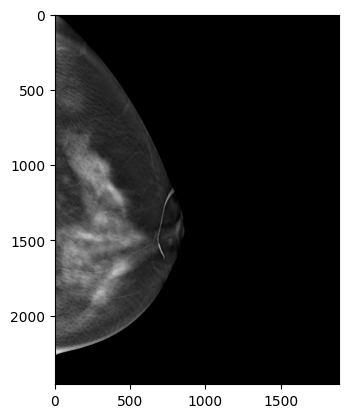

In [7]:
plt.imshow(image[0], cmap=plt.cm.gray);

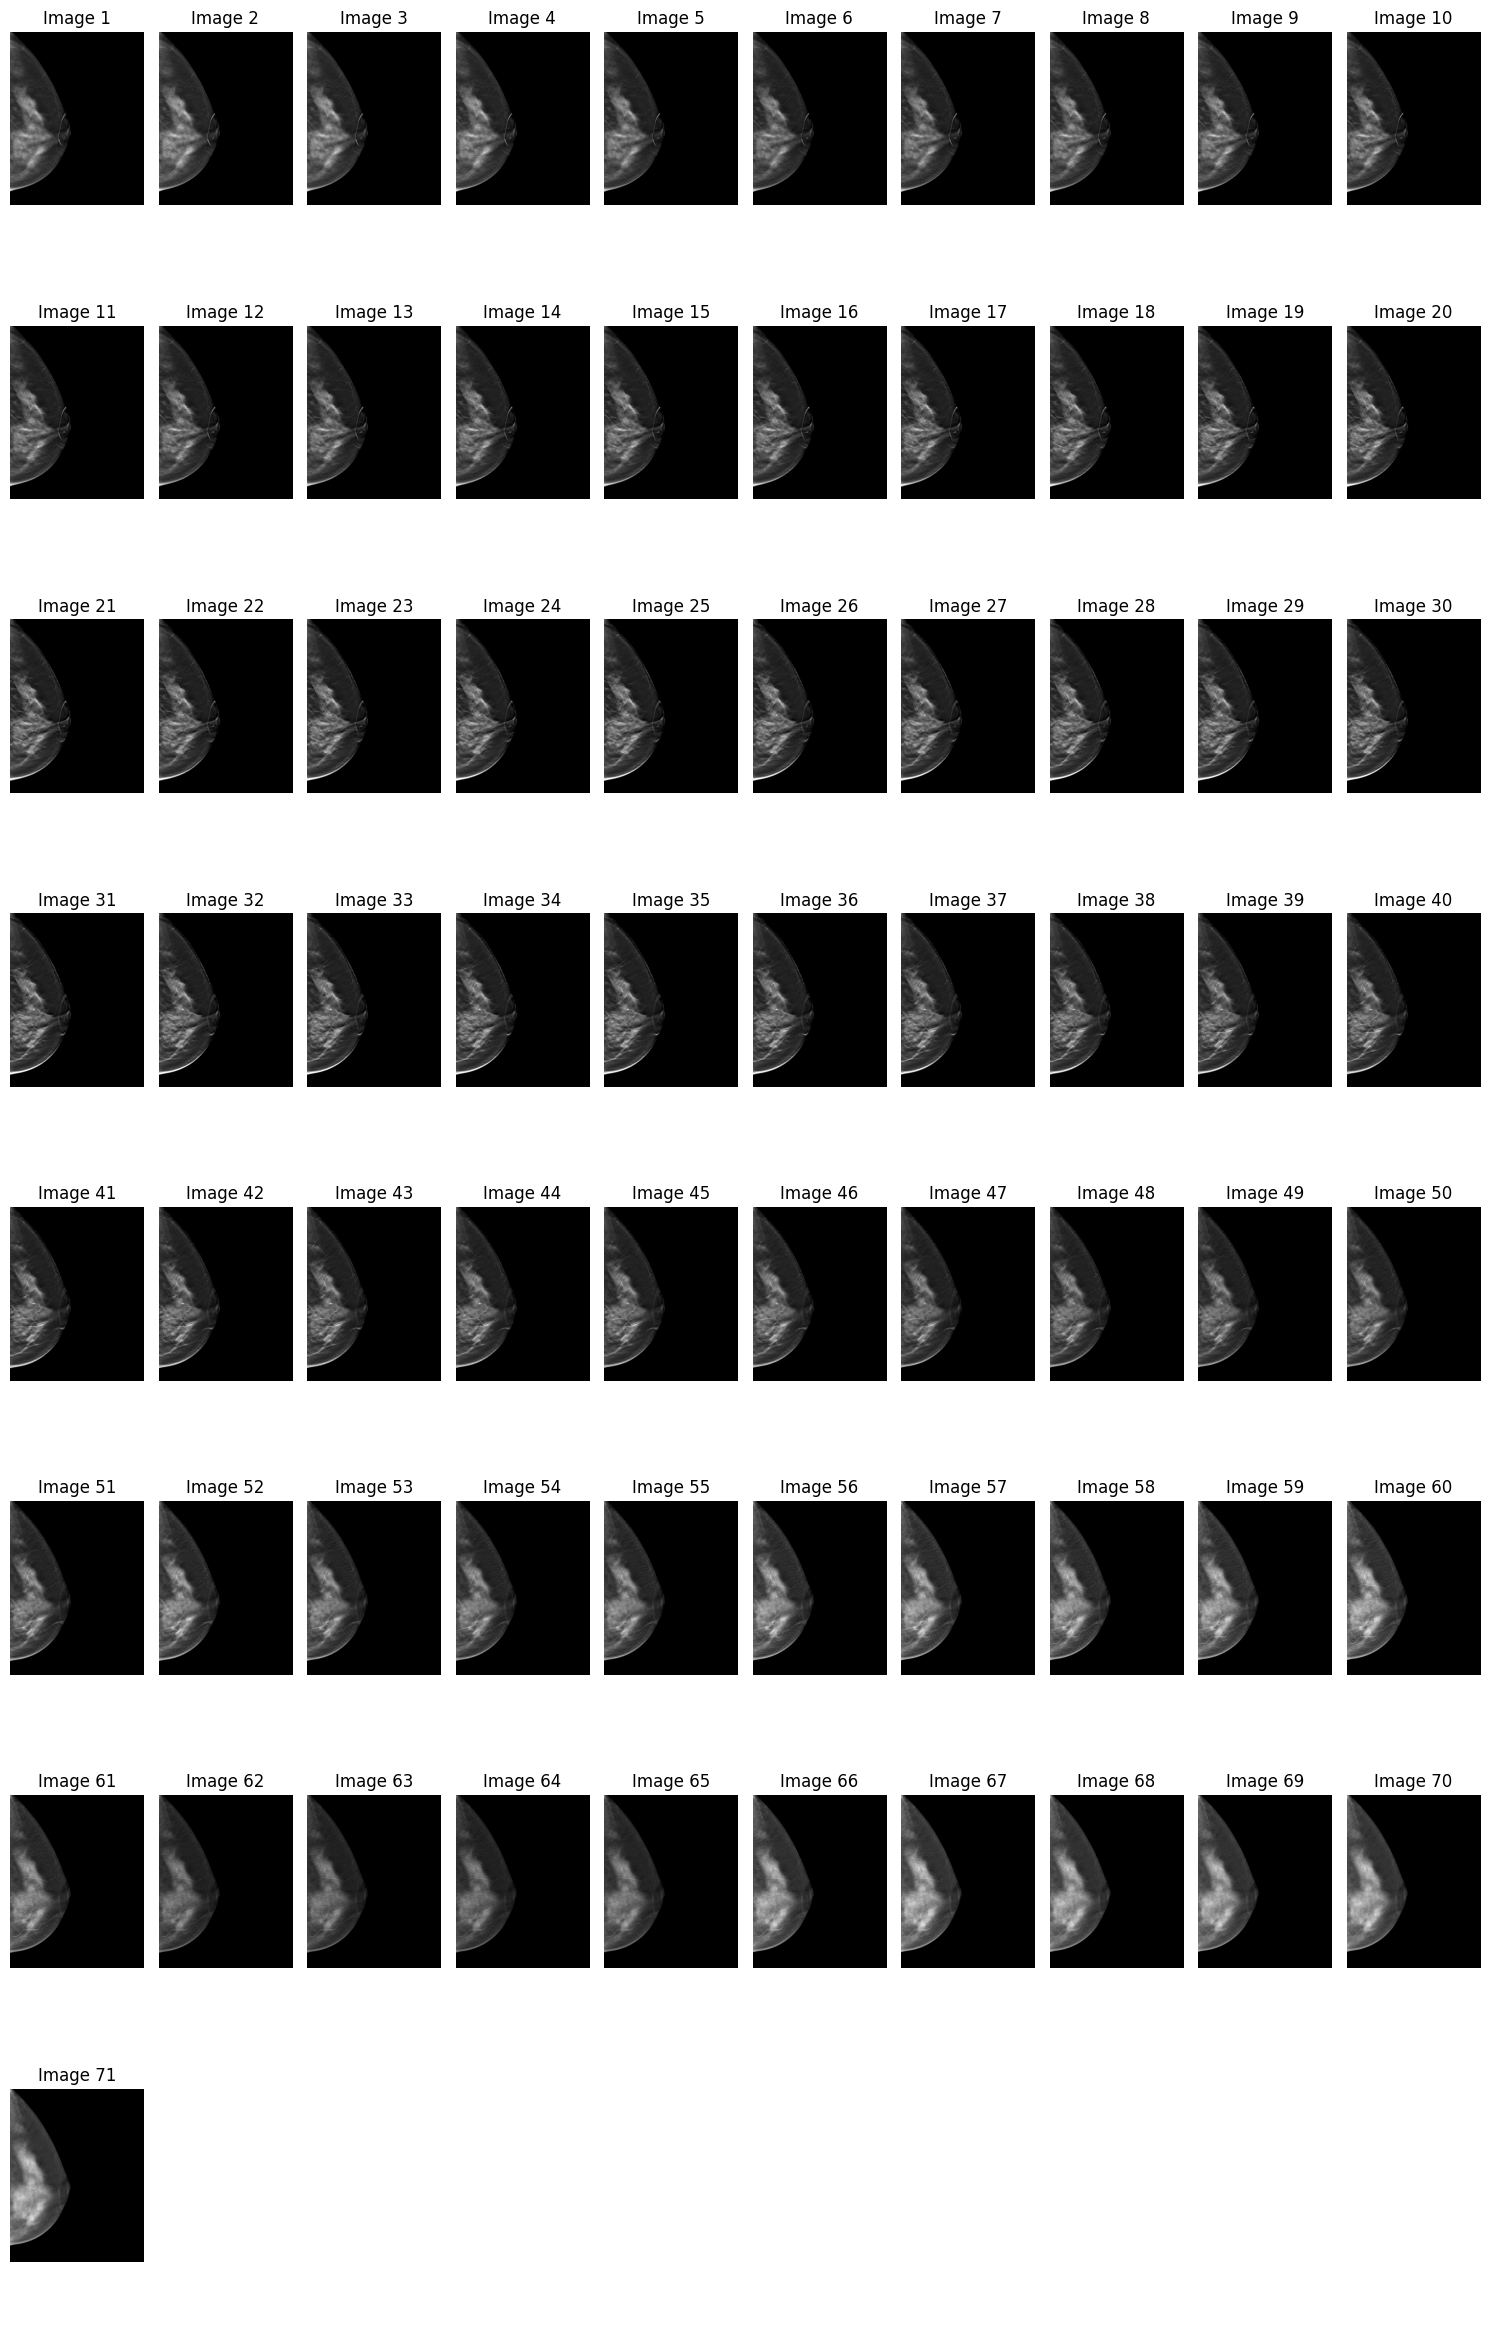

In [18]:
num_images = len(image)
columns = 10 # Número de columnas en la cuadrícula
rows = (num_images + columns - 1) // columns  # Calculamos el número de filas necesario

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))

for i in range(rows * columns):
    ax = axes[i // columns, i % columns]
    if i < num_images:
        ax.imshow(image[i], cmap=plt.cm.gray)
        ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.savefig('DBT-imagenes-numeradas.png', bbox_inches='tight', pad_inches=0.1)
plt.show()